# Librería

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_ENABLE_ONEDNN_OPTS'] =  "0"



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Librerías
import seaborn as sns
import sys
import cv2 as cv2
import glob
from PIL import Image
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import gc
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import os


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2024-06-07 14:46:41.442391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 14:46:41.442995: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 14:46:41.450069: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-07 14:46:41.834860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


In [2]:
## Uso de GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2024-06-07 03:31:01.350347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-07 03:31:01.424116: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-07 03:31:01.424282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Datos

In [3]:
## Obtener todas las rutas de las imágenes en el dataset
ruta = '../Datasets/Micrografías_segmentadas/secas/*/*/*/*.jpg'
rutas_dataset  = glob.glob('../../../Datasets/Micrografías segmentaciones/secas/*/*/*/*.jpg')

## Separar rutas
mask_list = []
image_list = []
for ruta in rutas_dataset:    
    ruta_list = ruta.split('/')       
    clase = ruta_list[6]
    number = ruta_list[7]
    tipo = ruta_list[8]
    name = ruta_list[9].split('.')[0]
    
    if tipo == 'train':
        image_list.append([name,ruta,clase,number])
    elif tipo == 'mask_bin':
        mask_list.append([name,ruta,clase,number])
    else:
        None

mask_pd = pd.DataFrame(mask_list,columns=['name','route_mask','label','number']).sort_values(by='name')
image_pd = pd.DataFrame(image_list,columns=['name','route_image','label','number']).sort_values(by='name')

routes_dataset = image_pd.merge(mask_pd,on=['name','label','number'],how='left')

routes_dataset.dropna(inplace=True)

routes_dataset = routes_dataset.sample(frac = 1)

print('Imágenes secas:', np.shape(routes_dataset)[0])
print('MF1:', np.shape(routes_dataset[routes_dataset['label']=='MF1'])[0])
print('MF2:', np.shape(routes_dataset[routes_dataset['label']=='MF2'])[0])
print('MF3:', np.shape(routes_dataset[routes_dataset['label']=='MF3'])[0])

char_to_num = {'MF1':'0','MF2':'1','MF3':'2'}

routes_dataset['label'].replace(char_to_num,inplace=True)

routes_dataset

Imágenes secas: 923
MF1: 378
MF2: 284
MF3: 261


,name,route_image,label,number,route_mask
20,IMG_20230601_152226_jpg,../../../Datasets/Micrografías segmentaciones/...,2,1,../../../Datasets/Micrografías segmentaciones/...
597,IMG_20230711_163656_jpg,../../../Datasets/Micrografías segmentaciones/...,1,3,../../../Datasets/Micrografías segmentaciones/...
293,IMG_20230707_174041_jpg,../../../Datasets/Micrografías segmentaciones/...,0,4,../../../Datasets/Micrografías segmentaciones/...
922,IMG_20230711_223125_jpg,../../../Datasets/Micrografías segmentaciones/...,2,5,../../../Datasets/Micrografías segmentaciones/...
363,IMG_20230707_181006_jpg,../../../Datasets/Micrografías segmentaciones/...,0,5,../../../Datasets/Micrografías segmentaciones/...
...,...,...,...,...,...
665,IMG_20230711_174531_jpg,../../../Datasets/Micrografías segmentaciones/...,1,5,../../../Datasets/Micrografías segmentaciones/...
74,IMG_20230602_221151_jpg,../../../Datasets/Micrografías segmentaciones/...,2,4,../../../Datasets/Micrografías segmentaciones/...
612,IMG_20230711_165738_jpg,../../../Datasets/Micrografías segmentaciones/...,1,4,../../../Datasets/Micrografías segmentaciones/...
136,IMG_20230707_162257_jpg,../../../Datasets/Micrografías segmentaciones/...,0,1,../../../Datasets/Micrografías segmentaciones/...


In [4]:
## Establecer el porcentaje de separación
thold1 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='0'])))
thold2 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='1'])))
thold3 = int(np.ceil(0.8 * len(routes_dataset[routes_dataset.label=='2'])))

## Separar por clases para entrenamiento
train_cu1 = routes_dataset[routes_dataset.label == '0'][0:thold1]
train_cu2 = routes_dataset[routes_dataset.label == '1'][0:thold2]
train_cu3 = routes_dataset[routes_dataset.label == '2'][0:thold3]

## tomar las demás imágenes para test
test_cu1 = routes_dataset[routes_dataset.label == '0'][thold1:]
test_cu2 = routes_dataset[routes_dataset.label == '1'][thold2:]
test_cu3 = routes_dataset[routes_dataset.label == '2'][thold3:]


## Constuir un solo dataset de training
train_df =  pd.concat([pd.concat([train_cu1,train_cu2]),train_cu3]).sample(frac=1,random_state=42).reset_index(drop=True)

## Construir un solo dataset de test
test_df = pd.concat([pd.concat([test_cu1,test_cu2]),test_cu3]).sample(frac=1,random_state=100).reset_index(drop=True)

## Cantidad de muestras por clase
print('Clase MF1: train: ',len(train_cu1),', test: ',len(test_cu1))
print('Clase MF2: train: ',len(train_cu2),', test: ',len(test_cu2))
print('Clase MF3: train: ',len(train_cu3),', test: ',len(test_cu3))

Clase MF1: train:  303 , test:  75
Clase MF2: train:  228 , test:  56
Clase MF3: train:  209 , test:  52


In [5]:
## Function to get contours and features
def get_contours_and_features(binary_map):
    #https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html
    binary_map = cv2.cvtColor(binary_map, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours_features = []
    for contour in contours:
        error = 1e-5
        moments = cv2.moments(contour)
        cx = moments['m10'] / (moments['m00'] + error)
        cy = moments['m01'] / (moments['m00'] + error)
        center_of_mass = [cx, cy]
        x,y,w,h = cv2.boundingRect(contour)        
        rect_area = w*h
        features = {
            'bounding_box': (x,y,w,h),
            'area': cv2.contourArea(contour),
            'perimeter': cv2.arcLength(contour, True),       
            #'solidity': np.float32(cv2.contourArea(contour))/cv2.convexHull(contour),
            'equivalent_diameter': np.sqrt(4*cv2.contourArea(contour)/np.pi),            
            'moments': moments,
            'center_of_mass': center_of_mass,
            'contour': contour
        }
        contours_features.append(features)
        del features
    #plt.imshow(contours_map, cmap='gray')
    return contours_features

# function to get a determined property from a list of contours features (area by default)
def get_item(contour_features, key='area'):
    areas = []
    for contour_feature in contour_features:
        area =  contour_feature[key]
        areas.append(area)
    return areas

# function to get tensor of one image
def load_image(file_name):
  raw = tf.io.read_file(file_name)
  tensor = tf.io.decode_jpeg(raw,channels=1)
  tensor = tf.image.resize(tensor, [128,128])
  tensor = tf.cast(tensor, tf.float32) / 255.0
  return tensor

# function to get set of binary image from image loaded
def get_binary_image(filenames):
    tensores = []
    for filename in filenames:
        raw = tf.io.read_file(filename)
        tensor = tf.io.decode_jpeg(raw,channels=3)
        tensor = tf.image.resize(tensor, [128,128])
        tensor = tf.cast(tensor, tf.float32) / 255.0
        tensores.append(tensor)
    return tensores

def get_geometric_atributes(binary_images):
    descriptors = []
    for binary_img in binary_images:
        ## Formato
        image = binary_img.numpy().astype(np.uint8)       
        
        ## Capturar contornos
        contour_features = get_contours_and_features(image)
        
        ## Calcular vector de áreas de poro (todos los poros)
        areas = get_item(contour_features, key='area')

        ## Calcular vector de perímetros de poro (todo los poros)
        pmtro = get_item(contour_features, key='perimeter')

        ## Calcular el diametro equivalente de los poros
        eq_diameter = get_item(contour_features, key='equivalent_diameter')           

        ## Número de poros
        npores = np.shape(areas)[0]

        descriptor = [np.mean(areas), np.mean(pmtro),np.mean(eq_diameter), npores]
        
        descriptors.append(descriptor)
        
    
    return descriptors

def create_dataset(buffer,file_names, labels, file_mask): 
  ## Get binary images   
  masks = get_binary_image(file_mask)
  ## Get geometric atributes from binary images
  attributes = get_geometric_atributes(masks)
  ## Create dataset from tensors assosiated with labels and attributes
  dataset = tf.data.Dataset.from_tensor_slices((file_names,labels,attributes))
  ## Shuffle dataset
  dataset.shuffle(buffer_size=buffer)
  ## Map dataset to load images (a = image, b = label, c = attributes, d = mask)
  dataset = dataset.map(lambda file_name, label, attributes : (load_image(file_name), label, attributes))

  return dataset

file_names = train_df['route_image'].to_numpy()
file_mask = train_df['route_mask'].to_numpy()
labels = train_df['label'].to_numpy()
## Create training dataset using tf.data of 16 images
dataset = create_dataset(16,file_names, labels,file_mask)

2024-06-07 03:31:10.303568: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-07 03:31:10.303786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-07 03:31:10.303936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[289.89130435  74.36067769  18.61859191  23.        ]
b'0'


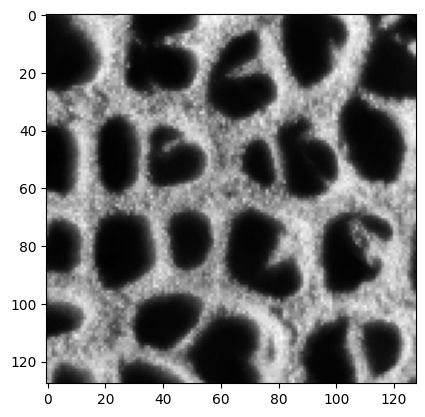

In [6]:
cnt = 0
for i in dataset.batch(16):
    a = i[0]
    b = i[1]
    c = i[2]
    #d = i[3]

n =  0
print(c[n].numpy())
print(b[n].numpy())
plt.imshow(a[n],cmap='gray')
#plt.imshow(d[n],cmap='gray')
plt.show()

# Modelos

### Autoencoder convencional

### Variational autoencoder

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")        

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data[0])
            reconstruction = self.decoder(z)
            reconstruction /= tf.reduce_max(reconstruction)
            
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data[0], reconstruction), axis=(1, 2)
                )
            )
            
            '''
            reconstruction_loss =tf.reduce_mean(
                tf.reduce_sum( tf.keras.losses.MeanSquaredError()(data, reconstruction)
                             )
            )
            '''
            
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))            
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.reconstruction = reconstruction
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)       
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),            
        }

In [ ]:
###_____________________________ENCODER________________________##
latent_dim = 16

nx, ny = 128, 128

encoder_inputs = keras.Input(shape=(nx, ny,1))

x = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same',name='layer_E1')(encoder_inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same',name='layer_E2')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='layer_E3')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',name='layer_E4')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_E6')(x)
x = layers.Flatten()(x)



z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")
encoder.summary()

In [ ]:
## Entrada Z
latent_inputs = keras.Input(shape=(latent_dim,))

##dimensiones
ndim = 16
nfilts = 128

## anti-flatten de la última capa convolucional
x = layers.Dense(ndim * ndim * nfilts, activation="relu")(latent_inputs)

## Reshape para reconstruir la última convolucional
x = layers.Reshape((ndim,ndim, nfilts))(x)

## Capas convolucionales
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D1')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D2')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_D4')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_D6')(x)

decoder_outputs = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='layer_D7')(x)

## Construcción del decoder
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

In [ ]:
vae = VAE(encoder, decoder)
opt = tf.optimizers.Adam(learning_rate = 0.000001)
#nll = lambda x , rv_x: -rv_x.log_prob(x)
vae.compile(optimizer=opt)


vae.fit(dataset.batch(16), epochs=2000, 
                batch_size=16,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)])

In [ ]:
### Guardar modelo https://www.tensorflow.org/guide/saved_model?hl=es-419
vae.encoder.save('Models2/GVAE_encoder_DRY_1_16.h5')
vae.decoder.save('Models2/GVAE_decoder_DRY_1_16.h5')

del vae

### Disentangled variational autoencoder

In [7]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(keras.Model):
    def __init__(self, encoder, decoder, regressor, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.regressor_area = regressor
        self.regressor_perimeter = regressor
        self.regressor_eq_diameter = regressor
        self.regressor_nporos = regressor
        ## loss_tracker
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")        
        self.estimation_area_loss_tracker = keras.metrics.Mean(name="estimation_area_loss")
        self.estimation_perimeter_loss_tracker = keras.metrics.Mean(name="estimation_perimeter_loss")
        self.estimation_eq_diameter_loss_tracker = keras.metrics.Mean(name="estimation_eq_diameter_loss")
        self.estimation_nporos_loss_tracker = keras.metrics.Mean(name="estimation_nporos_loss")


    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.estimation_area_loss_tracker,
            self.estimation_perimeter_loss_tracker,
            self.estimation_eq_diameter_loss_tracker,
            self.estimation_nporos_loss_tracker           
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            ## Valores estimados por el encoder
            z_mean, z_log_var, z = self.encoder(data[0])
            
            ## Valores geométricos asociados a los datos
            geometrics_features = data[2]

            ## Reconstrucción del embebido del encoder
            reconstruction = self.decoder(z)            

            ## Reducción de la reconstrucción
            reconstruction /= tf.reduce_max(reconstruction)

            ## Valores estimados apartir del regresor            
            area_estimation = self.regressor_area(z)
            perimeter_estimation = self.regressor_perimeter(z)
            eq_diameter_estimation = self.regressor_eq_diameter(z)
            nporos_estimation = self.regressor_nporos(z)
            
            ## Error de area RMSE
            area_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(geometrics_features[:,0], area_estimation))
            ## Error de perímetro RMSE
            perimeter_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(geometrics_features[:,1], perimeter_estimation))
            ## Error de diámetro equivalente RMSE
            eq_diameter_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(geometrics_features[:,2], eq_diameter_estimation))
            ## Error de número de poros RMSE
            nporos_loss = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(geometrics_features[:,3], nporos_estimation))         
                                   
            
            ## Error de reconstrucción
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data[0], reconstruction), axis=(1, 2)
                )
            )

            '''
            reconstruction_loss =tf.reduce_mean(
                tf.reduce_sum( tf.keras.losses.MeanSquaredError()(data, reconstruction)
                             )
            )
            '''           
                       
            
            ## Error de divergencia KL
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))   

            ## Error total          
            total_loss = reconstruction_loss + kl_loss + area_loss + perimeter_loss + eq_diameter_loss + nporos_loss
        
        ## Actualización de los gradientes
        grads = tape.gradient(total_loss, self.trainable_weights)

        ## Actualización de lA RECONSTRUCCIÓN
        self.reconstruction = reconstruction

        ### Actualización de los pesos
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)   
        self.estimation_area_loss_tracker.update_state(area_loss)
        self.estimation_perimeter_loss_tracker.update_state(perimeter_loss)
        self.estimation_eq_diameter_loss_tracker.update_state(eq_diameter_loss)
        self.estimation_nporos_loss_tracker.update_state(nporos_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(), 
            "Area_Error": self.estimation_area_loss_tracker.result(),
            "Perimeter_Error": self.estimation_perimeter_loss_tracker.result(),
            "Eq_Diameter_Error": self.estimation_eq_diameter_loss_tracker.result(),
            "Nporos_Error": self.estimation_nporos_loss_tracker.result()        
        }

In [8]:
###_____________________________ENCODER________________________##
latent_dim = 16

nx, ny = 128, 128

encoder_inputs = keras.Input(shape=(nx, ny,1))

x = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same',name='layer_E1')(encoder_inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same',name='layer_E2')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='layer_E3')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_E4')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_E6')(x)
x = layers.Flatten()(x)



z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 layer_E1 (Conv2D)           (None, 128, 128, 1024)       10240     ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 1024)         0         ['layer_E1[0][0]']            
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 1024)         4096      ['max_pooling2d[0][0]'] 

In [9]:
## Entrada Z
latent_inputs = keras.Input(shape=(latent_dim,))

##dimensiones
ndim = 16
nfilts = 128

## anti-flatten de la última capa convolucional
x = layers.Dense(ndim * ndim * nfilts, activation="relu")(latent_inputs)

## Reshape para reconstruir la última convolucional
x = layers.Reshape((ndim,ndim, nfilts))(x)

## Capas convolucionales
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D1')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',name='layer_D2')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',name='layer_D4')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='layer_D6')(x)

decoder_outputs = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='layer_D7')(x)

## Construcción del decoder
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 32768)             557056    
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 layer_D1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                          

In [10]:
### Estimador de un único valor geométrico

## Input layer for regressor model of 16-dim vector input
regressor_inputs = keras.Input(shape=(latent_dim,))

## Hidden dense layer
x = layers.Dense(8, activation='relu')(regressor_inputs)
x = layers.BatchNormalization()(x)

x = layers.Dense(4, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(2, activation='relu')(x)
x = layers.BatchNormalization()(x)

## Output layer
regressor_output_feature = layers.Dense(1, activation="linear")(x)


## regressor model
regressor = keras.Model(regressor_inputs, regressor_output_feature, name="regressor")
regressor.summary()

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_7 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 batch_normalization_8 (Bat  (None, 4)                 16        
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 2)                 10

In [11]:
vae = VAE(encoder, decoder,regressor)
opt = tf.optimizers.Adam(learning_rate = 0.000001)
#nll = lambda x , rv_x: -rv_x.log_prob(x)
vae.compile(optimizer=opt)


vae.fit(dataset.batch(16), epochs=2000, 
                batch_size=16,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=45)])

Epoch 1/2000


2024-06-07 03:32:58.787982: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-06-07 03:33:01.215649: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8298009990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-07 03:33:01.215676: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-06-07 03:33:01.241617: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-07 03:33:01.375573: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-07 03:33:06.320720: W tensorflow/tsl/framework/bfc_allocator.cc:366] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate 

47/47 [==============================] - 27s 203ms/step - loss: 87150.5163 - reconstruction_loss: 48725.9570 - kl_loss: 0.0021 - Area_Error: 32325.8641 - Perimeter_Error: 2939.4206 - Eq_Diameter_Error: 190.3615 - Nporos_Error: 2794.1672
Epoch 2/2000
47/47 [==============================] - 7s 148ms/step - loss: 86314.9248 - reconstruction_loss: 47766.6914 - kl_loss: 0.0021 - Area_Error: 32331.3196 - Perimeter_Error: 2941.1301 - Eq_Diameter_Error: 190.8023 - Nporos_Error: 2795.1104
Epoch 3/2000
47/47 [==============================] - 7s 149ms/step - loss: 85643.5376 - reconstruction_loss: 47122.9141 - kl_loss: 0.0026 - Area_Error: 32334.5928 - Perimeter_Error: 2942.1902 - Eq_Diameter_Error: 191.0565 - Nporos_Error: 2796.4521
Epoch 4/2000
47/47 [==============================] - 7s 149ms/step - loss: 85092.2451 - reconstruction_loss: 46963.6289 - kl_loss: 0.0041 - Area_Error: 32332.1538 - Perimeter_Error: 2941.4725 - Eq_Diameter_Error: 190.9004 - Nporos_Error: 2796.0772
Epoch 5/2000
47/

In [12]:
### Guardar modelohttps://www.tensorflow.org/guide/saved_model?hl=es-419
## crear carpeta dentro de models para guardar los modelos si no existe
name_new_folder = 'MULTI_regressor_1'
if not os.path.exists('Models2/'+name_new_folder):
    os.makedirs('Models2/'+name_new_folder)
    vae.encoder.save('Models2/'+name_new_folder+'/dist_GVAE_encoder_1_16.h5')
    vae.decoder.save('Models2/'+name_new_folder+'/dist_GVAE_decoder_1_16.h5')
    vae.regressor_area.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_area_1_16.h5')
    vae.regressor_perimeter.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_perimeter_1_16.h5')
    vae.regressor_eq_diameter.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_eq_diameter_1_16.h5')
    vae.regressor_nporos.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_nporos_1_16.h5')    
else:
    vae.encoder.save('Models2/'+name_new_folder+'/dist_GVAE_encoder_1_16.h5')
    vae.decoder.save('Models2/'+name_new_folder+'/dist_GVAE_decoder_1_16.h5')
    vae.regressor_area.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_area_1_16.h5')
    vae.regressor_perimeter.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_perimeter_1_16.h5')
    vae.regressor_eq_diameter.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_eq_diameter_1_16.h5')
    vae.regressor_nporos.save('Models2/'+name_new_folder+'/dist_GVAE_regressor_nporos_1_16.h5')
    


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
